In [1]:
import numpy as np
from matplotlib import pyplot as plt

L=1
Nx=103
D=10**(-6)
dt=100*D
t_final=500000*D
x_ax=np.linspace(0,L+L/(Nx-1),Nx+1)
dx=x_ax[1]-x_ax[0]
t_ax=np.arange(0,t_final+dt,dt)
print(dx,dt)

bcdl=1
bcdr=0
C0=0
grid=np.zeros((len(t_ax),len(x_ax)))
grid[:,0]=bcdl
s=dt/(dx**2)
s=s/2
print(s)

0.00980392156862745 9.999999999999999e-05
0.5201999999999999


In [2]:
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [3]:
def analytic(x, t):
    result = 1
    for n in range(1001):
        result -= 2*(-1)**n/((n+0.5)*np.pi)*np.cos((n+0.5)*np.pi*(1-x))*np.exp(-(n+1/2)**2*np.pi*np.pi*t)
    return result

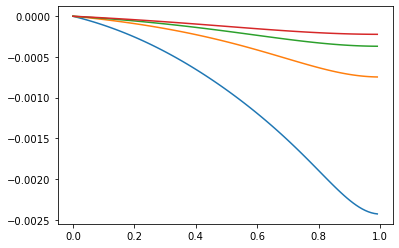

In [4]:
a=np.full(Nx-1,-s)
a[-1]+=-s
b=np.full(Nx,(1+2*s))
b[0]=1
c=np.full(Nx-1,-s)
c[0]=0
d=np.zeros(Nx)
dn=np.zeros(Nx)
dn[0]=1
d[0]=1
errors=[]

for t in range(len(t_ax)-1):
    d=TDMAsolver(a,b,c,d)
    #d=TDMAsolver(aa,bb,cc,d)
    if t>1:
        for i in range(1,len(d)-1):
            dn[i]=s*d[i-1]+(1-2*s)*d[i]+s*d[i+1]
            dn[-1]=2*s*d[-2]+(1-2*s)*d[-1]
    d=dn
    
    d[0]=1
    errors.append(np.sum(np.abs(d[0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt)))/(Nx-1))
    if(t%1000==0 and t>1):
        #plt.plot(x_ax[0:Nx],d)
        plt.plot(x_ax[0:Nx-1],(d[0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt))/d[0:Nx-1])

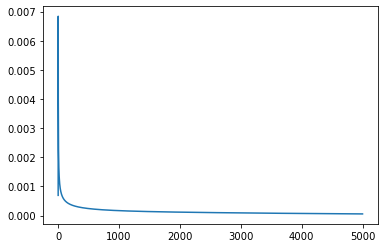

In [5]:
plt.plot(errors)